In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from sklearn import metrics

### Importing matplotlib colours 

In [2]:
import matplotlib.colors as mcolors
i = mcolors.CSS4_COLORS
colors = []
for  col in i:
    colors.append(col)

In [3]:
colors = colors[10:30]

In [4]:
def PointInCircum(r,n=100):
    x = [(math.cos(2*math.pi/n*x)*r+np.random.normal(-20,20),math.sin(2*math.pi/n*x)*r+ np.random.normal(-20,20))for x in range(1,n+1)]
    return x
a = pd.DataFrame(PointInCircum(400,900))
b = pd.DataFrame(PointInCircum(260,600))
c= pd.DataFrame(PointInCircum(90,200))

In [5]:
noise = [(np.random.randint(-500,500),np.random.randint(-500,500)) for i in range(300)]
noise = pd.DataFrame(noise)

In [6]:
df = pd.concat([a,b,c,noise],axis=0).reset_index().drop('index',axis=1)

In [7]:
df

,0,1
0,348.452241,7.560718
1,368.700011,-1.172124
2,382.401580,-14.964907
3,368.257420,36.617726
4,352.715085,-4.243734
...,...,...
1995,369.000000,183.000000
1996,52.000000,492.000000
1997,340.000000,307.000000
1998,-487.000000,-185.000000


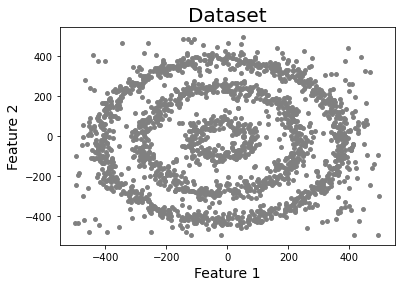

In [8]:
plt.scatter(df[0], df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [9]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=2,random_state=42)
k_means.fit(df[[0,1]])


KMeans(n_clusters=2, random_state=42)

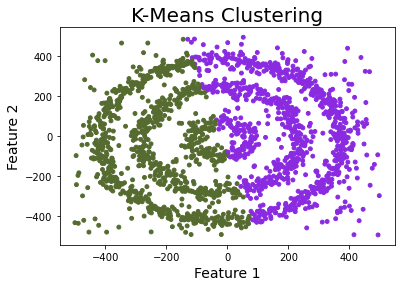

In [10]:

df['KMeans_labels']=k_means.labels_
# Plotting resulting clusters
plt.scatter(df[0],df[1],c=df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()


In [11]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df[[0,1]])


DBSCAN()

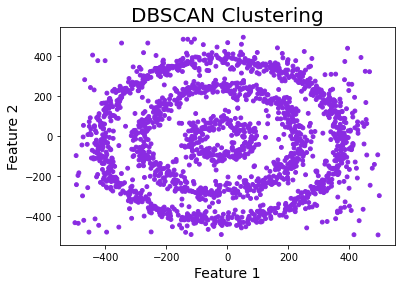

In [12]:
df['DBSCAN_labels']=dbscan.labels_
# Plotting resulting clusters
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [23]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])


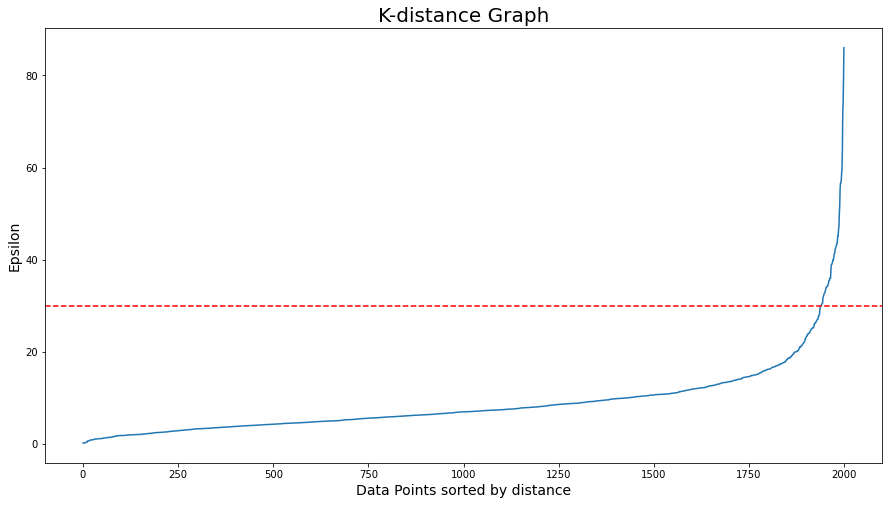

In [24]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=30, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [25]:
import warnings
warnings.filterwarnings("ignore")

eps=30
for min_samples in range(3, 15,1):
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(df)
    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('\n','eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)



 eps= 30 | min_samples=  3 | obtained clustering:  [(1, 94), (2, 1658), (3, 224), (4, 3), (5, 4), (6, 8), (7, 3), (8, 3), (9, 3)]

 eps= 30 | min_samples=  4 | obtained clustering:  [(1, 115), (2, 1000), (3, 651), (4, 222), (5, 4), (6, 8)]

 eps= 30 | min_samples=  5 | obtained clustering:  [(1, 128), (2, 996), (3, 647), (4, 221), (5, 8)]

 eps= 30 | min_samples=  6 | obtained clustering:  [(1, 137), (2, 991), (3, 645), (4, 219), (5, 8)]

 eps= 30 | min_samples=  7 | obtained clustering:  [(1, 160), (2, 977), (3, 640), (4, 216), (5, 7)]

 eps= 30 | min_samples=  8 | obtained clustering:  [(1, 179), (2, 972), (3, 635), (4, 214)]

 eps= 30 | min_samples=  9 | obtained clustering:  [(1, 186), (2, 968), (3, 632), (4, 214)]

 eps= 30 | min_samples=  10 | obtained clustering:  [(1, 203), (2, 959), (3, 625), (4, 213)]

 eps= 30 | min_samples=  11 | obtained clustering:  [(1, 213), (2, 955), (3, 619), (4, 213)]

 eps= 30 | min_samples=  12 | obtained clustering:  [(1, 239), (2, 677), (3, 108)

Silhouette Coefficient: -0.165


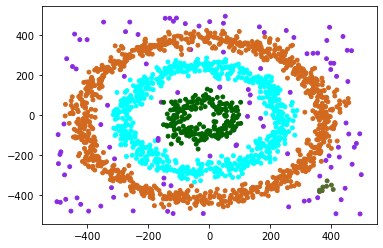

In [16]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30,min_samples=5)
dbscan_opt.fit(df[[0,1]])
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()
plt.scatter(df[0],df[1], c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df, df['DBSCAN_opt_labels']))

#### Improving Silhouette_Score by hypertuning samples

In [17]:
for i in range(2,17):
    dbscan_opt=DBSCAN(eps=30,min_samples=i)
    dbscan_opt.fit(df[[0,1]])
    df['DBSCAN_opt_labels']=dbscan_opt.labels_
    df['DBSCAN_opt_labels'].value_counts()
    print(i,"Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df, df['DBSCAN_opt_labels']))
    

2 Silhouette Coefficient: -0.569
3 Silhouette Coefficient: -0.316
4 Silhouette Coefficient: -0.217
5 Silhouette Coefficient: -0.165
6 Silhouette Coefficient: -0.166
7 Silhouette Coefficient: -0.168
8 Silhouette Coefficient: -0.121
9 Silhouette Coefficient: -0.122
10 Silhouette Coefficient: -0.124
11 Silhouette Coefficient: -0.124
12 Silhouette Coefficient: -0.075
13 Silhouette Coefficient: 0.113
14 Silhouette Coefficient: 0.125
15 Silhouette Coefficient: 0.157
16 Silhouette Coefficient: 0.140


# Final Model

Silhouette Coefficient: 0.157


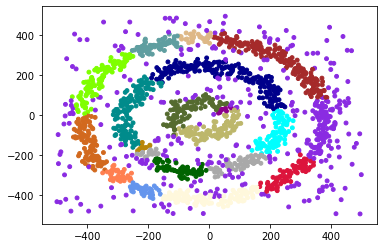

In [19]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30,min_samples=15)
dbscan_opt.fit(df[[0,1]])
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()
plt.scatter(df[0],df[1], c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df, df['DBSCAN_opt_labels']))